In [45]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns
import pandas as pd

In [3]:
data = pd.read_csv('Naive algorithm experiment.csv')
data_other = pd.read_csv('Naive algorithm experiment_other-data.csv')
data

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,can_flag,naive_alg_steps,parameters_id,task_id
0,2,0,0.019859,25,15,0.004064,Beginner (8x8),10x10,True,NaN,False,False,0.0,2,2
1,2,2,0.023963,19,14,0.004383,Beginner (8x8),10x10,True,NaN,True,False,0.0,1,1
2,2,1,0.025840,25,15,0.003445,Beginner (9x9),11x11,True,NaN,False,False,0.0,4,4
3,4,4,0.031380,22,21,0.006753,Beginner (9x9),11x11,True,NaN,True,False,0.0,3,3
4,4,3,0.018518,29,26,0.004916,Beginner (8x8),10x10,True,NaN,True,False,1.0,9,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19195,1,0,0.289297,25,20,0.029073,Expert (16x30),18x32,True,NaN,False,True,NaN,96,19200
19196,3,0,0.888338,63,45,0.679883,Intermediate (16x16),18x18,True,NaN,False,True,4.0,86,19190
19197,2,0,0.943195,77,69,0.151003,Expert (16x30),18x32,True,NaN,True,True,4.0,87,19191
19198,2,0,0.522463,77,69,0.076501,Expert (16x30),18x32,True,NaN,True,True,NaN,95,19199


In [4]:
data_other

,first_click_pos,sample_size,num_games,verbose,visualise,agent_seed,run_seed,batch_size,num_processes
0,NaN,NaN,1000,False,False,50,5050,5,6


In [5]:
df = data.groupby('parameters_id').sum()[['wins', 'wins_without_guess', 'time_elapsed', 'samples_considered', 'samples_with_solutions', 'samples_solve_duration_total']]
df

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total
parameters_id,,,,,,
1,578,299,5.369687,5018,3429,1.214956
2,430,88,5.704349,5226,2439,1.026231
3,808,608,5.363425,4424,3621,1.059418
4,673,222,5.782332,4859,2952,0.927334
5,521,245,44.353983,10270,8266,10.225475
...,...,...,...,...,...,...
92,793,326,8.501700,4452,3081,3.450264
93,814,621,54.790283,8885,8348,22.004831
94,589,162,53.529729,8196,5974,21.927608


In [6]:
df2 = data.groupby('parameters_id').first()[['difficulty', 'sample_size', 'use_num_mines_constraint', 'first_click_pos', 'first_click_is_zero', 'naive_alg_steps', 'can_flag']]
df2

,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps,can_flag
parameters_id,,,,,,,
1,Beginner (8x8),10x10,True,NaN,True,0.0,False
2,Beginner (8x8),10x10,True,NaN,False,0.0,False
3,Beginner (9x9),11x11,True,NaN,True,0.0,False
4,Beginner (9x9),11x11,True,NaN,False,0.0,False
5,Intermediate (16x16),18x18,True,NaN,True,0.0,False
...,...,...,...,...,...,...,...
92,Beginner (9x9),11x11,True,NaN,False,NaN,True
93,Intermediate (16x16),18x18,True,NaN,True,NaN,True
94,Intermediate (16x16),18x18,True,NaN,False,NaN,True


In [7]:
df3 = df.join(df2)
df3

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps,can_flag
parameters_id,,,,,,,,,,,,,
1,578,299,5.369687,5018,3429,1.214956,Beginner (8x8),10x10,True,NaN,True,0.0,False
2,430,88,5.704349,5226,2439,1.026231,Beginner (8x8),10x10,True,NaN,False,0.0,False
3,808,608,5.363425,4424,3621,1.059418,Beginner (9x9),11x11,True,NaN,True,0.0,False
4,673,222,5.782332,4859,2952,0.927334,Beginner (9x9),11x11,True,NaN,False,0.0,False
5,521,245,44.353983,10270,8266,10.225475,Intermediate (16x16),18x18,True,NaN,True,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,793,326,8.501700,4452,3081,3.450264,Beginner (9x9),11x11,True,NaN,False,NaN,True
93,814,621,54.790283,8885,8348,22.004831,Intermediate (16x16),18x18,True,NaN,True,NaN,True
94,589,162,53.529729,8196,5974,21.927608,Intermediate (16x16),18x18,True,NaN,False,NaN,True


In [8]:
num_games = int(data_other['num_games'])
df3['win rate (%)'] = (df3['wins'] / num_games) * 100
df3['win rate without guess (%)'] = (df3['wins_without_guess'] / num_games) * 100
df3

,wins,wins_without_guess,time_elapsed,samples_considered,samples_with_solutions,samples_solve_duration_total,difficulty,sample_size,use_num_mines_constraint,first_click_pos,first_click_is_zero,naive_alg_steps,can_flag,win rate (%),win rate without guess (%)
parameters_id,,,,,,,,,,,,,,,
1,578,299,5.369687,5018,3429,1.214956,Beginner (8x8),10x10,True,NaN,True,0.0,False,57.8,29.9
2,430,88,5.704349,5226,2439,1.026231,Beginner (8x8),10x10,True,NaN,False,0.0,False,43.0,8.8
3,808,608,5.363425,4424,3621,1.059418,Beginner (9x9),11x11,True,NaN,True,0.0,False,80.8,60.8
4,673,222,5.782332,4859,2952,0.927334,Beginner (9x9),11x11,True,NaN,False,0.0,False,67.3,22.2
5,521,245,44.353983,10270,8266,10.225475,Intermediate (16x16),18x18,True,NaN,True,0.0,False,52.1,24.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92,793,326,8.501700,4452,3081,3.450264,Beginner (9x9),11x11,True,NaN,False,NaN,True,79.3,32.6
93,814,621,54.790283,8885,8348,22.004831,Intermediate (16x16),18x18,True,NaN,True,NaN,True,81.4,62.1
94,589,162,53.529729,8196,5974,21.927608,Intermediate (16x16),18x18,True,NaN,False,NaN,True,58.9,16.2


In [91]:
df3 = df3.fillna(value={'naive_alg_steps': 'Unlimited'})

# Analysis

In [92]:
sns.set_theme()

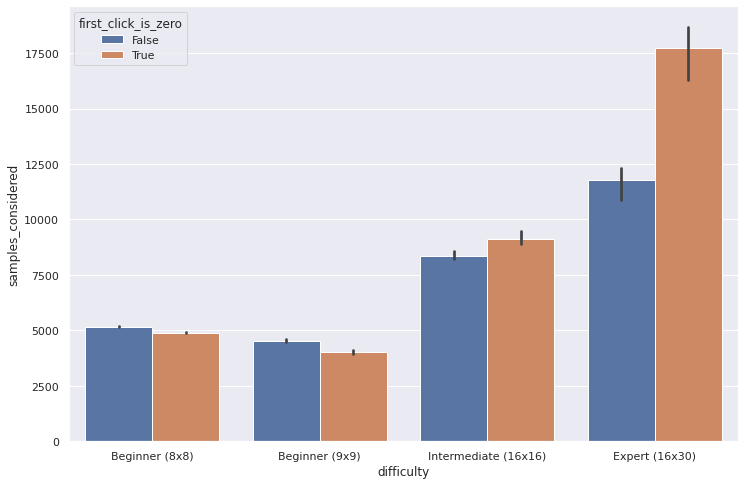

In [93]:
sns.barplot(x='difficulty', y='samples_considered', hue='first_click_is_zero', data=df3)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

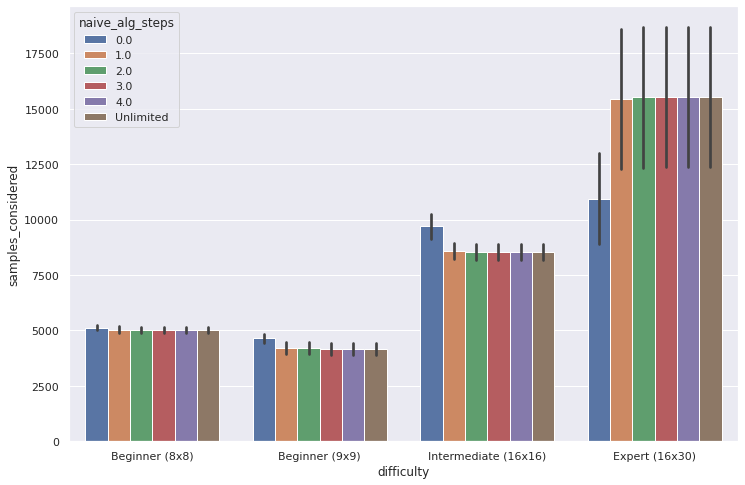

In [94]:
sns.barplot(x='difficulty', y='samples_considered', hue='naive_alg_steps', data=df3)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

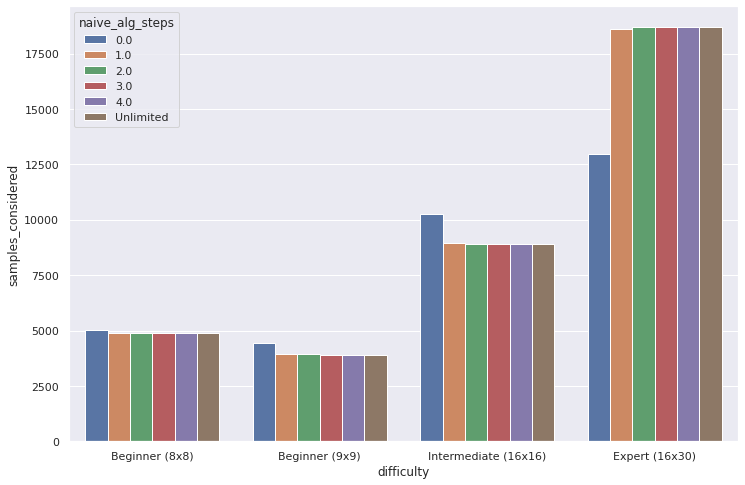

In [95]:
df4 = df3[df3['first_click_is_zero'] == True]
sns.barplot(x='difficulty', y='samples_considered', hue='naive_alg_steps', data=df4)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

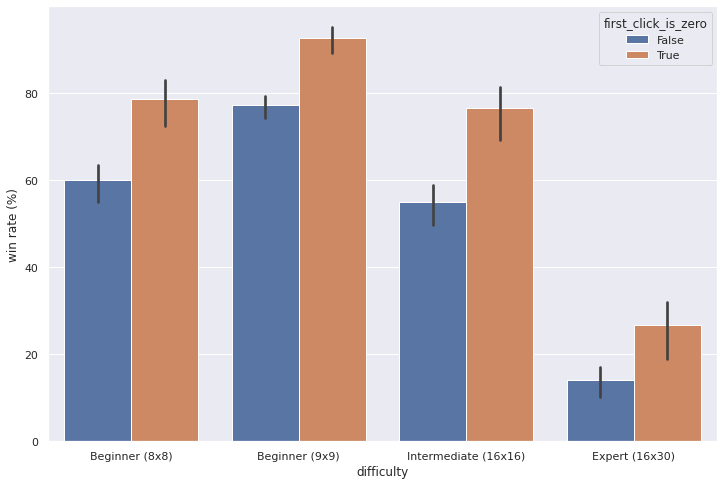

In [96]:
sns.barplot(x='difficulty', y='win rate (%)', hue='first_click_is_zero', data=df3)
fig = plt.gcf()
fig.set_size_inches(12, 8)
plt.show()

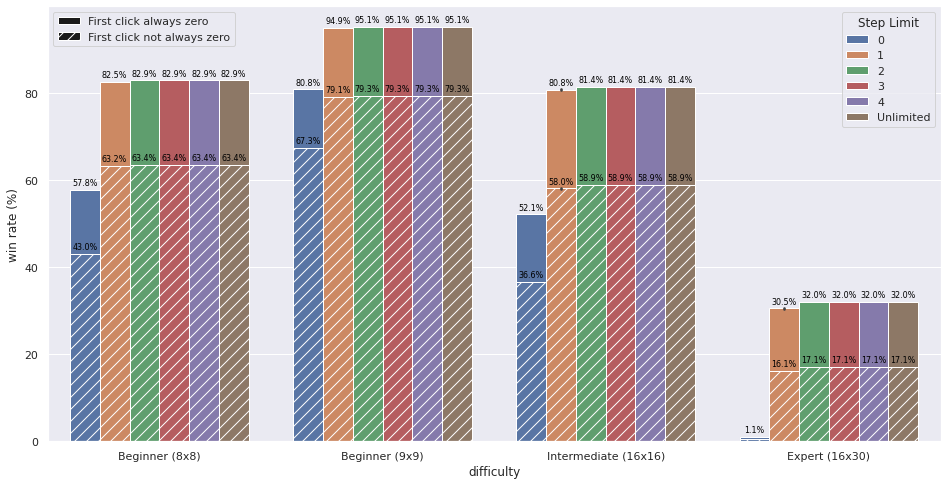

In [127]:
df4 = df3[df3['first_click_is_zero'] == True]
df5 = df3[df3['first_click_is_zero'] == False]

g = sns.barplot(x='difficulty', y='win rate (%)', hue='naive_alg_steps', data=df4, palette='deep')
sns.barplot(x='difficulty', y='win rate (%)', hue='naive_alg_steps', data=df5, palette='deep', hatch='//')

for p in g.patches:
    if p.get_height() < 1:
        continue
        
    g.annotate(f"{p.get_height():.1f}%", (p.get_x() + p.get_width() / 2., p.get_height()),
     ha='center', va='center', fontsize=8, color='black', xytext=(0, 7),
     textcoords='offset points')


fig = plt.gcf()
fig.set_size_inches(16, 8)


# Get/create patches (coloured boxes to display in legend)
patches = g.legend_.get_patches()[:6]
patch1 = Patch(facecolor='k', edgecolor='w')
patch2 = Patch(facecolor='k', edgecolor='w', hatch='//')

# Add both legends
legend1 = plt.legend([patch1, patch2], ["First click always zero", "First click not always zero"], loc=2)
plt.legend(title="Step Limit", handles=patches, labels=['0', '1', '2', '3', '4', 'Unlimited'], loc=1)
plt.gca().add_artist(legend1)

plt.show()

In [98]:
a = df3[(df3['can_flag'] == True)]
b = df3[(df3['can_flag'] == False)]
# a['win rate (%)'].map(float) - b['win rate (%)'].map(float)
# print(a['win rate (%)'])
# print(b['win rate (%)'])
a = a.reset_index()
b = b.reset_index()
print(a.head(15))
a['win rate (%)'] - b['win rate (%)']

    parameters_id  wins  wins_without_guess  time_elapsed  samples_considered  \
0              49   578                 299      4.937611                5018   
1              50   430                  88      5.457141                5226   
2              51   808                 608      5.087373                4424   
3              52   673                 222      5.755270                4859   
4              53   521                 245     37.128563               10270   
5              54   366                  61     33.187468                9143   
6              55    11                   0    103.297019               12987   
7              56     5                   0     71.762532                8881   
8              57   825                 626      5.398411                4892   
9              58   632                 190      6.074750                5190   
10             59   949                 857      5.040412                3935   
11             60   791     

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.1
13    0.1
14    0.2
15    0.0
16    0.0
17    0.0
18    0.0
19    0.0
20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
27    0.0
28    0.0
29    0.0
30    0.0
31    0.0
32    0.0
33    0.0
34    0.0
35    0.0
36    0.0
37    0.0
38    0.0
39    0.0
40    0.0
41    0.0
42    0.0
43    0.0
44    0.0
45    0.0
46    0.0
47    0.0
Name: win rate (%), dtype: float64